<a href="https://colab.research.google.com/github/Atharvk13/ML_Lab/blob/main/Copy_of_Image_Classification_using_ANN_for_XRAY_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DEEP LEARNING ANN MODEL FOR X RAY IMAGES

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**2. Move to the place where data resides**

In [3]:
%cd /content/drive/MyDrive/ML Lab

/content/drive/MyDrive/ML Lab


In [4]:
!ls

covid_dataset  covid_dataset.zip  split


**3. Unziping the dataset**

In [5]:
!pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1281 sha256=672f5e6bc34165de64203a17cde8bbd29366ee5d3d174ea9422c51155d95298c
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip


In [6]:
!unzip covid_dataset.zip

Archive:  covid_dataset.zip
replace covid_dataset/COVID/COVID-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: covid_dataset/COVID/COVID-1.png  
  inflating: covid_dataset/COVID/COVID-10.png  
  inflating: covid_dataset/COVID/COVID-11.png  
  inflating: covid_dataset/COVID/COVID-12.png  
  inflating: covid_dataset/COVID/COVID-13.png  
  inflating: covid_dataset/COVID/COVID-14.png  
  inflating: covid_dataset/COVID/COVID-15.png  
  inflating: covid_dataset/COVID/COVID-16.png  
  inflating: covid_dataset/COVID/COVID-17.png  
  inflating: covid_dataset/COVID/COVID-18.png  
  inflating: covid_dataset/COVID/COVID-19.png  
  inflating: covid_dataset/COVID/COVID-2.png  
  inflating: covid_dataset/COVID/COVID-20.png  
  inflating: covid_dataset/COVID/COVID-21.png  
  inflating: covid_dataset/COVID/COVID-22.png  
  inflating: covid_dataset/COVID/COVID-23.png  
  inflating: covid_dataset/COVID/COVID-24.png  
  inflating: covid_dataset/COVID/COVID-25.png  
  inflating: covid_dataset/CO

**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [7]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [8]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [01:49,  1.37 files/s]


**6. Loading the dataset with normalization in batches**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,145,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,150,147 (12.02 MB)

 Trainable params: 3,150,147 (12.02 MB)

 Non-trainable params: 0 (0.00 B)

**8. Model Compilation and Training**

In [12]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])  # Use 'accuracy'
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=int(train_generator.samples / train_generator.batch_size),  # Convert to int
      epochs=100,
      validation_data=validation_generator,
      validation_steps=int(validation_generator.samples / validation_generator.batch_size),  # Convert to int
      verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2632 - loss: 1.6942 - val_accuracy: 0.5000 - val_loss: 1.0113
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5309 - loss: 0.9437 - val_accuracy: 0.3750 - val_loss: 0.8218
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7117 - loss: 0.6169 - val_accuracy: 0.7500 - val_loss: 0.5350
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7334 - loss: 0.6170 - val_accuracy: 0.8750 - val_loss: 0.6382
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7845 - loss: 0.4848 - val_accuracy: 0.7500 - val_loss: 0.7826
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6711 - loss: 0.6560 - val_accuracy: 0.8750 - val_loss: 0.4698
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7985 - loss: 0.4975 - val_accuracy: 0.7500 - val_loss: 0.3993
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8770 - loss: 0.4002 - val_accuracy: 0.7500 - val_l

**9. Model saving**

In [13]:
model.save('covid_classification.h5')

**10. Model loading**

In [14]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [15]:
model.save_weights('covid_classification_weights.weights.h5')

**12. Model weights loading**

In [16]:
model.load_weights('covid_classification_weights.weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [17]:
train_acc = history.history['accuracy'] # Change 'acc' to 'accuracy'
val_acc = history.history['val_accuracy'] # Change 'val_acc' to 'val_accuracy'
train_loss = history.history['loss']
val_loss = history.history['val_loss']

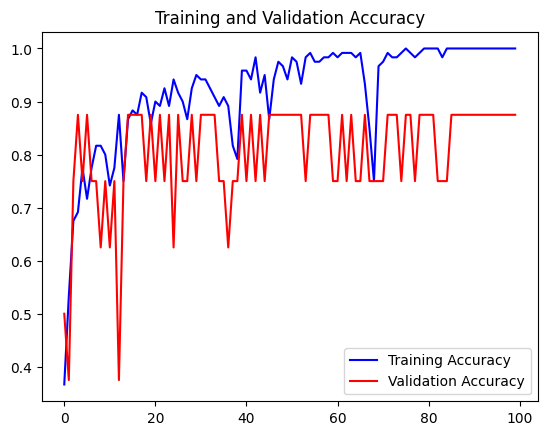

<Figure size 640x480 with 0 Axes>

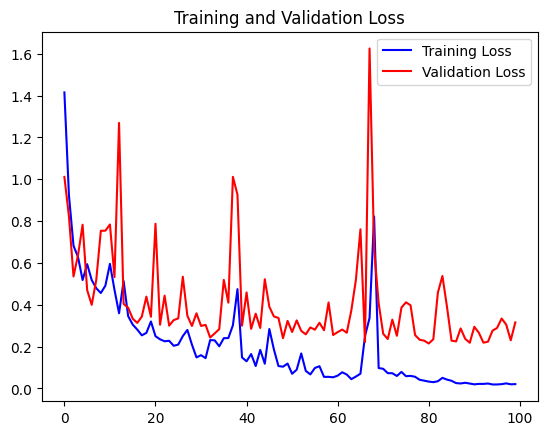

In [18]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [19]:
test_output = model.evaluate(
    test_generator,
    steps=int(test_generator.samples / test_generator.batch_size),  # Convert steps to an integer
    verbose=1
)
print(test_output)
print(model.metrics_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.6250 - loss: 1.6679
[1.6679214239120483, 0.625]
['loss', 'compile_metrics']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/